In [55]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [56]:
def WeightedMean(var):
    weights = np.cos(np.deg2rad(var.lat))
    if len(var.shape) >= 2:
        return var.weighted(weights).mean(dim=('lat', 'lon'))
    else:
        return var.weighted(weights).mean("lat")

In [57]:
def forcing_srfalb(ax, type):

    if type == 'all-sky':
        srad = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
        prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')
        forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
        #ax.set_title('Direct effect against surface albedo')
        ax.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]')
        
    elif type == 'clear-sky':
        srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_monmean_1950-2013.nc')
        prp = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_monmean_1950-2013.nc')
        forcing = (prp.dR_spd_sraf0 + prp.dR_spd_traf0)
        #ax.set_title('Direct effect against surface albedo')

    albedo = (- srad.sradsu /(srad.srads - srad.sradsu))
    albedo = albedo.where(albedo>0)

    ax.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,15], bins='log', cmap='plasma')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0.5, color='black', linewidth=0.8)
    ax.set_xlim([0.0,1])

    #ax.set_xlabel('Surface albedo')


    return 0

In [58]:
def forcing_plnalb(ax, type):

    if type == 'all-sky':
        srad = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
        prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')
        forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
        albedo = - srad.srad0u/(srad.srad0d)
        #ax.set_title('Direct effect against surface albedo')
        ax.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]')
        
    elif type == 'clear-sky':
        srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_monmean_1950-2013.nc')
        prp = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_monmean_1950-2013.nc')
        forcing = (prp.dR_spd_sraf0 + prp.dR_spd_traf0)
        albedo = - (srad.sraf0 - srad.srad0d)/(srad.srad0d)
        #ax.set_title('Direct effect against surface albedo')

    albedo = albedo.where((albedo > 0) & (albedo < 1))

    ax.hexbin(albedo, forcing, gridsize=200, extent=[0,1,-20,15], bins='log', cmap='plasma')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0.5, color='black', linewidth=0.8)
    ax.set_xlim([0.0,1])

    #ax.set_xlabel('Planetary albedo')


    return 0

In [59]:
def forcing_irradiance(ax, type):
    if type == 'all-sky':
        srad = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_BOT_yearmean.nc')
        prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_PRP_yearmean.nc')
        forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
        #ax.set_title('Direct effect against surface albedo')
        ax.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]')
        ax.set_ylabel('Forcing from direct effect')
        
    elif type == 'clear-sky':
        srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
        prp = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc')
        forcing = (prp.dR_spd_sraf0 + prp.dR_spd_traf0)
        #ax.set_title('Direct effect against surface albedo')

    irradiance = srad.srad0d

    ax.hexbin(irradiance, forcing, gridsize=200, bins='log', cmap='plasma')
    ax.axhline(0, color='black', linewidth=0.8)

    #ax.set_xlabel('TOA incoming solar radiation')

    #ax.set_title('Direct effect against incoming solar radiation')

    return 0

In [60]:
def forcing_cldcov(ax, type):
    if type == 'all-sky':
        srad = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_BOT_monmean_1950-2013.nc')
        prp = xr.open_dataset('../../albedo/datasets/historical-CR_single-plumes_3D_PRP_monmean_1950-2013.nc')
        forcing = (prp.dR_spd_srad0 + prp.dR_spd_trad0)
        cloud = srad.aclcov
        #ax.set_title('Direct effect against surface albedo')
        ax.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]')
        ax.set_ylabel('Forcing from direct effect')
        
    elif type == 'clear-sky':
        srad = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_BOT_yearmean_1950-2013.nc')
        prp = xr.open_dataset('../datasets/historical-CR_single-plumes_clear-sky_PRP_yearmean_1950-2013.nc')
        forcing = (prp.dR_spd_sraf0 + prp.dR_spd_traf0)
        #ax.set_title('Direct effect against surface albedo')

    ax.hexbin(cloud, forcing, gridsize=200, bins='log', cmap='plasma')
    ax.axhline(0, color='black', linewidth=0.8)

    #ax.set_xlabel('TOA incoming solar radiation')

    #ax.set_title('Direct effect against incoming solar radiation')

    return 0

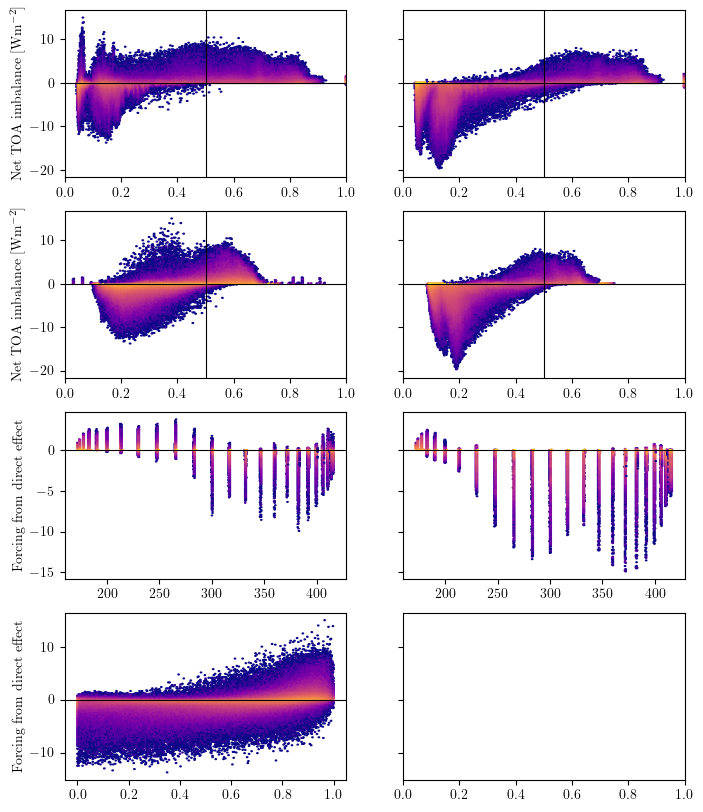

In [61]:
def main():

    fig, ax = plt.subplots(2,2, sharey='row')

    forcing_srfalb(ax[0,0], 'all-sky')
    forcing_srfalb(ax[0,1], 'clear-sky')

    forcing_plnalb(ax[1,0], 'all-sky')
    forcing_plnalb(ax[1,1], 'clear-sky')

    forcing_irradiance(ax[2,0], 'all-sky')
    forcing_irradiance(ax[2,1], 'clear-sky')

    forcing_cldcov(ax[3,0], 'all-sky')

    fig = plt.gcf()
    fig.set_size_inches(8, 10)

    plt.savefig('../figures/multi-plot.pdf', bbox_inches='tight')

    return 0

if __name__ == "__main__":
    main()
